In [1]:
%matplotlib inline

import sys
import os
from os.path import join
from pathlib import Path
sys.path.append(join(Path(os.getcwd()).parent, 'lib'))
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (4,4)

def plotar(batch):  
    for n,c in enumerate(batch):
        ax, s = plt.subplots()
        title = deg(mm[c].rolling(window=100).mean())     
        mm[c].plot(title=str(c)+'_'+str(title))
        mm[c].rolling(window=100).mean().plot()

def div_batch(x, n_batches):
    l=[]
    batch_size = int(len(x)/n_batches)
    for i in range(0, n_batches*batch_size, batch_size):
        l.append(x[i:i+batch_size])
    l.append(x[(batch_size*n_batches-1):])
    return l

def ps(x):
    return pd.Series(x)

with open('../../info/info-LIGHT.json','rt') as p:
    data = json.load(p)

mm_path = data['paths']['mm']['input']
mm = pd.read_csv(mm_path, sep=';', index_col = 0, parse_dates=[0])
mm.fillna(value=0, inplace=True)
l = div_batch(mm.columns, 60)

------

In [2]:
def aglut(*args):
    lo = args[0].copy()
    for l in args[1:]:
        lo.extend(l)
    return lo

In [3]:
def deg(x,o='left'):
    h1 = x[int(len(x)/2):].mean()
    h2 = x[:int(len(x)/2)].mean()
    if h1 > h2 * factor:
        a = 1 
    elif h1 < h2 / factor:
        a = -1        
    else:
        a=0
    if len(x)>=limite:  
        if o == 'right':
            return aglut([a], deg(x[int(len(x)/2):], o = 'right'))
        else:
            return aglut(deg(x[:int(len(x)/2)]), [a])    
    else:
        return [a]

In [4]:
def plotar2(mm, n):  
    for i in range(n):
        cols = mm.columns        
        v = int(np.random.sample() * len(cols) )
        s0 = mm[cols[v]]
        s1 = mm[cols[v]].clip(0,mm[cols[v]].quantile(0.99))
        s2=s1.rolling(window=500).mean().dropna()
        title = (aglut(deg(s1.rolling(window=500).mean().dropna()), deg(s1.rolling(window=500).mean().dropna(), o = 'right')))
        if cv(title):
            ax, s = plt.subplots()
            s0.plot()
            s1.plot()
            s2.plot(title=str(title))        

In [5]:
def cv(x):
    se0, se1, se2 = False, False, False
    for i in x:
        if se2:
            return 1
        if i == 0:            
            se0 = True
            if se1:
                se2 = True   
        elif i == -1 and se0:
            se1 = True   
        elif i == 1:
            return 0
    return 0

In [6]:
def cv2(x):
    se0, se1, se2 = False, False, False
    for i in x:
        if se2:
            return 1
        if i == 0:            
            se0 = True 
        elif i == -1 and se1:
            se2 = True
        elif i == 1 and se0:
            se1 = True   
    return 0

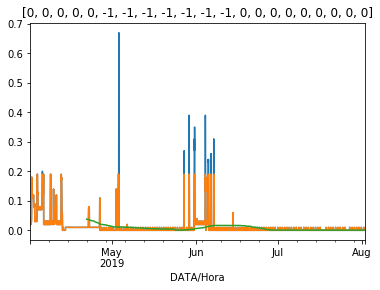

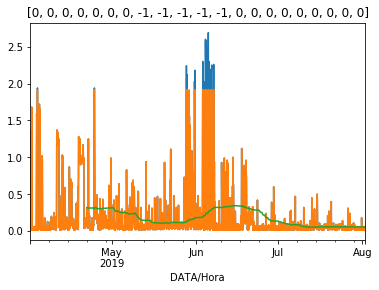

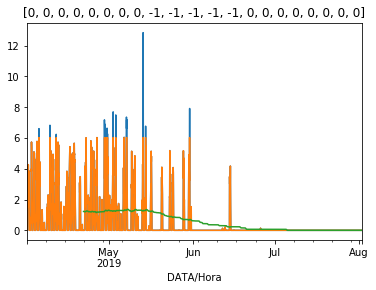

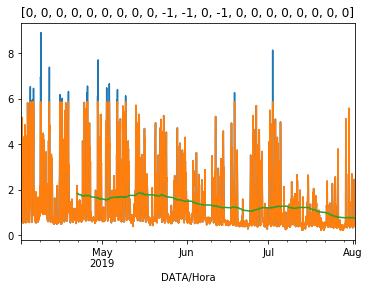

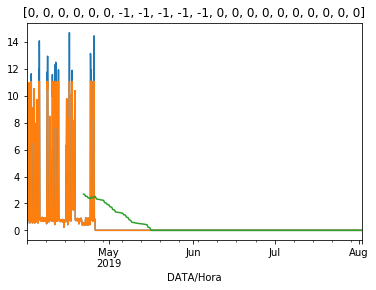

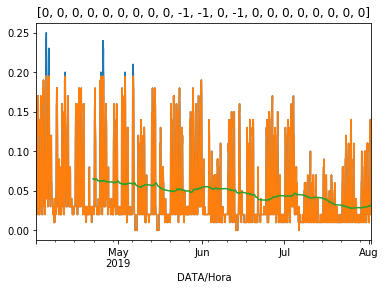

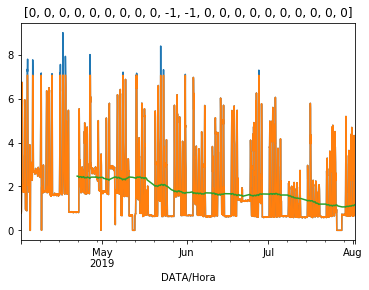

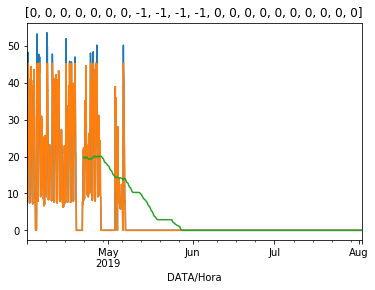

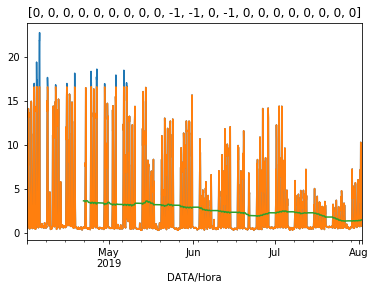

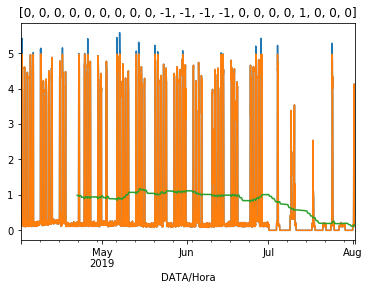

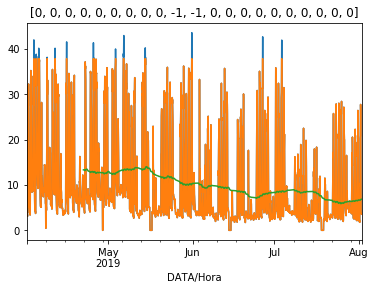

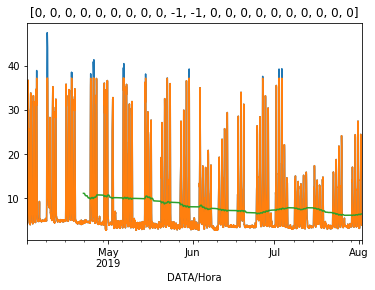

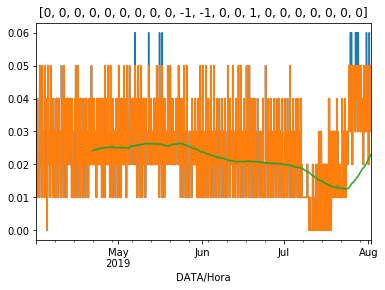

In [7]:
factor=1.3
limite=int(mm.shape[0]/512)
plotar2(mm, 50)